# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [34]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [17]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

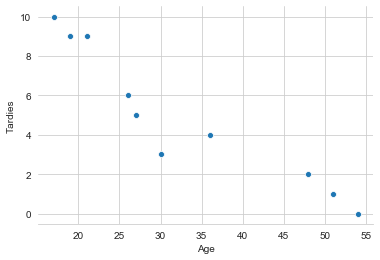

In [26]:
# Your code here.
sns.scatterplot(x = 'Age', y = 'Tardies', data = student_data)
sns.set_style("whitegrid")
sns.despine(left=True)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [23]:
# Your response here. 
'''
We can see that as people ages increase, the number of tardies decreases.'''


'\nWe can see that as people ages increase, the number of tardies decreases.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [50]:
# Your response here.

X = student_data['Age']
Y = student_data['Tardies']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)   ## change p-value with underscore '_' Will be explained in more details later
print("slope", slope,"\nintercept", intercept,"\nr value", r_value,"\np value", p_value,"\nerror", std_err)

y_pred = (slope * X) + intercept
res = Y - Y_pred

x_mean = X.mean()
y_mean = Y.mean()

slope -0.24282077091598084 
intercept 12.88880336313577 
r value -0.9391626886887123 
p value 5.56665383455336e-05 
error 0.03139728816158602


In [51]:
#correlation:
cor = cov/(X.std()*Y.std())
print('Correlation =', cor)

#covariance:
cov = ((sum(Y - y_mean))*(sum(X - x_mean)))/len(X)
print('Covariance =', cov)

Correlation = -1.0405764149214714e-31
Covariance = -5.048709793414476e-30


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [82]:
# Your response here.
import numpy as np
from sklearn.linear_model import LinearRegression

Y = student_data['Tardies']## Choose a dataset, one column
X = student_data[['Age', 'Tardies']]## Choose a dataset, multiple columns
lm = LinearRegression() # empty model - defining model

lm = LinearRegression() # empty model - defining model
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions = lm.predict(X)   ## Y predicted

Intercept:  3.552713678800501e-15
Coef:  [-1.29672982e-16  1.00000000e+00]


In [83]:
'''I have used a linear regression model. 
My outcome variable will be a prediction of Ages of people in the dataframe. '''

'I have used a linear regression model. \nMy outcome variable will be a prediction of Ages of people in the dataframe. '

Plot your regression model on your scatter plot.

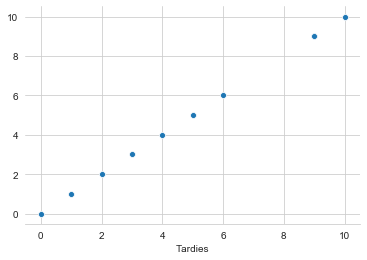

In [84]:
# Your code here.
sns.scatterplot(x = Y_test, y = predictions , data = student_data)
sns.despine(left=True)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [103]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [102]:
# Your response here. 
ds = pd.read_csv('vehicles.csv')
ds

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [104]:
# Declaring the variables for the model
Y = ds['CO2 Emission Grams/Mile']
X = ds[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]


In [109]:
# Your response here. 
# Using a multiple regression model
model = sm.OLS(Y,X)

results = model.fit()

predictions = results.predict(X)
predictions.head()


0    518.638632
1    668.608594
2    550.196992
3    668.671588
4    565.236341
dtype: float64

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [110]:
# Your response here. 
results.summary()
'''According to the R squared value the model used is very accurate. The number of cylinders, 
combined MPG and Fuel barrels/year will be more important, because they have a higher standard error, 
which means that they have more variability and dispersion of values.'''

'According to the R squared value the model used is very accurate. The number of cylinders, \ncombined MPG and Fuel barrels/year will be more important, because they have a higher standard error, \nwhich means that they have more variability and dispersion of values.'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [111]:
# Your code here.
# Building the dataframe
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
df


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [119]:
X = df['X']
Y = df['Y']


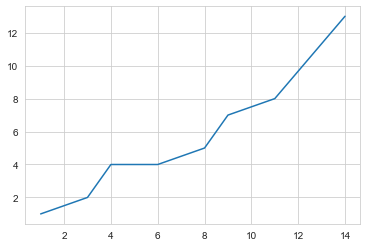

In [115]:
# Now checking the liearity of the two variables
plt.plot(X,Y)
plt.show()

'''The two variable are non linear. 
Therefore we must consider using a different regression rather than the linear one.'''

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

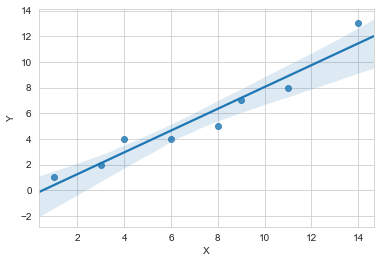

In [124]:
# Your code here.
reg_line = sns.regplot(X, Y, data = df)
reg_line

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
'''I see that the regression line plot is a positive slope straight line, 
indicating that the two variables are positively related.If more people are invited, 
more people attend the parties.
'''


In [123]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
print("slope", slope,"\nintercept", intercept,"\nr value", r_value,"\np value", p_value,"\nstd error", std_err)

slope 0.8484848484848485 
intercept -0.43939393939393945 
r value 0.9652303546573691 
p value 0.00010236374464090686 
std error 0.09380896778286217


In [121]:
RMSE = (sum(res**2)/len(X)) ** 0.5
RMSE

0.9333874443188752

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [126]:
# Your response here. 
#I will use Z-score function defined in scipy library to detect the outliers.

z = np.abs(stats.zscore(df))
print(z)


[[1.47709789 1.26025208]
 [0.98473193 0.98019606]
 [0.73854895 0.42008403]
 [0.24618298 0.42008403]
 [0.24618298 0.14002801]
 [0.49236596 0.42008403]
 [0.98473193 0.70014004]
 [1.72328087 2.10042013]]


In [151]:
# defining a threshold to identify an outlier
threshold = 3
print(np.where(z > 1.8))


(array([7]), array([1]))


In [152]:
z[7][1]

2.100420126042015

In [153]:
# Calculating Interquartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X    5.75
Y    3.75
dtype: float64


In [154]:
print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

       X      Y
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False
7  False  False


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

